In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/Google Colab Notebooks/Mini Sem 8/dataset/large sample/reliance_2years_60min.csv')

In [3]:
print(raw_data.shape)
raw_data.head()

(3037, 7)


,Unnamed: 0,open,high,low,close,volume,time
0,0,1369.099976,1377.800049,1356.550049,1370.000000,1971498,2020-04-23 03:45:00
1,1,1370.000000,1372.500000,1356.449951,1359.599976,4417574,2020-04-23 04:45:00
2,2,1359.000000,1367.449951,1353.849976,1365.050049,2826126,2020-04-23 05:45:00
3,3,1365.000000,1385.750000,1362.500000,1376.300049,5257084,2020-04-23 06:45:00
4,4,1376.699951,1377.800049,1360.099976,1373.900024,4124412,2020-04-23 07:45:00


In [4]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

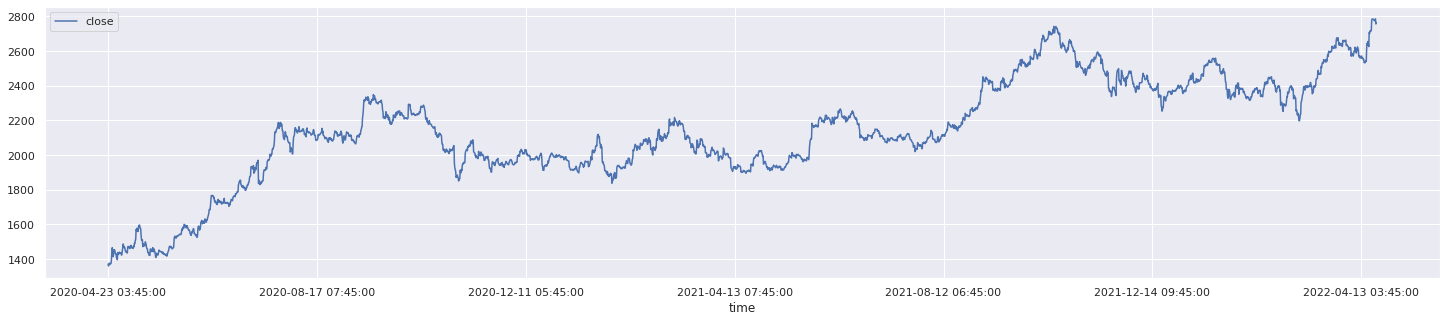

In [5]:
close_ds.plot(x='time', y='close', figsize=(25, 5))

In [6]:
# ema and vwap

from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier 
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)  
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):
  
  time_format = "%Y-%m-%d %H:%M:%S"
  
  sum_pv = 0
  sum_volume = 0
  
  vwap = []
  
  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):
    
    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [7]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 3037
 Days 10 
 Length of prices 3037
 Length of EMA list 3027
len ema = 3027
len vwap = 3037


In [8]:
# make all ema, vwap, prices lists of equal length 
price = price[-len(ema):]
vwap = vwap[-len(ema):]

No handles with labels found to put in legend.


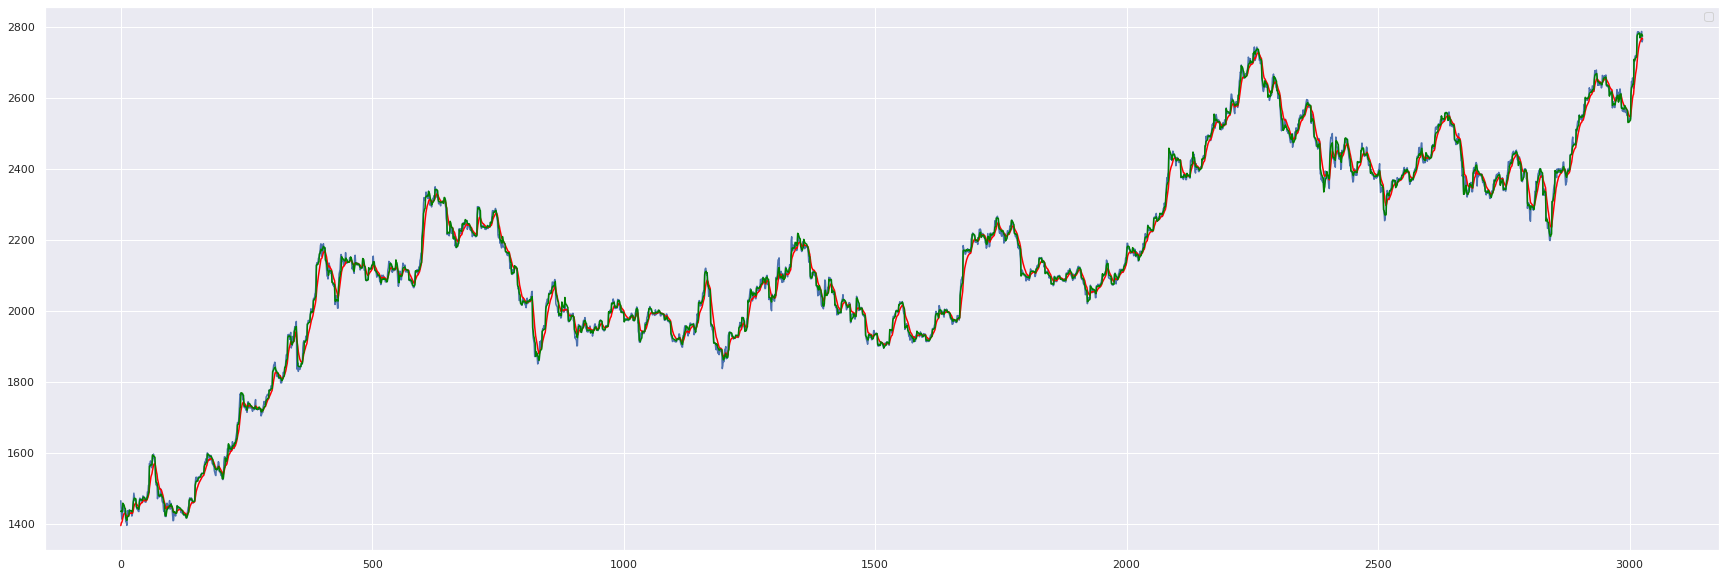

In [9]:
plt.figure(figsize=(30,10))

plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend()
plt.show()

In [10]:

# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [11]:

ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[1395.07410889 1435.15729957 1465.        ]
 [1402.47882524 1436.79016276 1435.80004883]
 [1404.46449782 1434.26341944 1413.40002441]
 ...
 [2767.89703307 2779.27396716 2786.39990234]
 [2765.88849936 2775.20206099 2756.85009766]
 [2765.36331766 2773.29525357 2763.        ]]


In [12]:
n_steps = 3 
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(3025, 3, 3) (3025,)
[[1395.07410889 1435.15729957 1465.        ]
 [1402.47882524 1436.79016276 1435.80004883]
 [1404.46449782 1434.26341944 1413.40002441]] 1413.4000244140625


In [13]:
# train_test_split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(2117, 3, 3)
(2117,)
(908, 3, 3)
(908,)


In [ ]:
# dataframe spliter

def split_dataset_by_day(df):
    time_format = "%Y-%m-%d %H:%M:%S"
    previous_day = datetime.strptime(df["time"][0], time_format).day
    begin_index = 0
    list_of_dfs = []
    for i in range(len(df)):
        current_day = datetime.strptime(df["time"][i], time_format).day
        if(current_day!=previous_day):
            sample_df = df.iloc[begin_index:i]
            list_of_dfs.append(sample_df)
            begin_index = i
    return list_of_dfs


In [18]:
# split close_ds in daywise batches 

test_df = close_ds.tail(908)
test_df_reindexed = test_df.reset_index(drop=True)
# test_df_reindexed
list_of_dfs_by_day = split_dataset_by_day(test_df_reindexed)
list_of_dfs_by_day[0]

,time,close
1,2021-09-15 04:45:00,2386.5


In [ ]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

# CNN

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,749
Trainable params: 3,749
Non-trainable params: 0
______________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cnn_history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/40
67/67 - 11s - loss: 1513284.6250 - val_loss: 237400.7188 - 11s/epoch - 167ms/step
Epoch 2/40
67/67 - 1s - loss: 24584.3418 - val_loss: 279.8281 - 814ms/epoch - 12ms/step
Epoch 3/40
67/67 - 0s - loss: 212.8215 - val_loss: 268.5096 - 406ms/epoch - 6ms/step
Epoch 4/40
67/67 - 0s - loss: 208.2525 - val_loss: 266.6445 - 274ms/epoch - 4ms/step
Epoch 5/40
67/67 - 0s - loss: 206.0996 - val_loss: 266.0239 - 346ms/epoch - 5ms/step
Epoch 6/40
67/67 - 0s - loss: 206.0202 - val_loss: 269.2050 - 273ms/epoch - 4ms/step
Epoch 7/40
67/67 - 0s - loss: 204.3392 - val_loss: 267.3300 - 336ms/epoch - 5ms/step
Epoch 8/40
67/67 - 0s - loss: 205.1047 - val_loss: 267.5800 - 282ms/epoch - 4ms/step
Epoch 9/40
67/67 - 0s - loss: 204.9640 - val_loss: 264.7025 - 276ms/epoch - 4ms/step
Epoch 10/40
67/67 - 0s - loss: 203.3390 - val_loss: 264.4725 - 278ms/epoch - 4ms/step
Epoch 11/40
67/67 - 0s - loss: 203.9899 - val_loss: 263.1809 - 276ms/epoch - 4ms/step
Epoch 12/40
67/67 - 0s - loss: 202.7618 - val_loss: 

Text(0, 0.5, 'MSE')

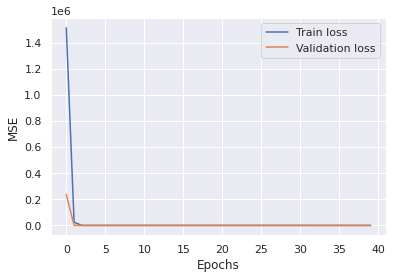

In [ ]:
# plots 
fig = plt.figure()
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [ ]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
cnn_train_pred = model_cnn.predict(X_train)
cnn_test_pred = model_cnn.predict(X_test)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_test, cnn_test_pred)))

Train rmse: 13.488985463465726
Validation rmse: 15.401866677580168


In [ ]:
print(y_test[0:10])
print(cnn_test_pred[0:10])

[2369.60009766 2386.5        2380.         2378.5        2380.69995117
 2376.30004883 2382.         2373.30004883 2422.19995117 2424.94995117]
[[2372.739 ]
 [2378.09  ]
 [2381.2139]
 [2380.6072]
 [2378.4978]
 [2378.2979]
 [2377.9106]
 [2377.8013]
 [2391.7236]
 [2407.6895]]


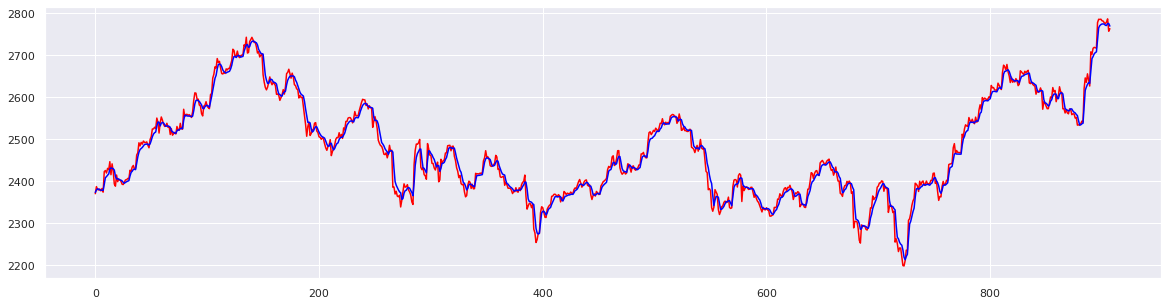

In [ ]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(20, 5))
plt.plot(pd.Series(y_test), color='red')
plt.plot(pd.Series(cnn_test_pred.flatten()), color='blue')

In [ ]:
# MAPE calculation
from sklearn.metrics import mean_absolute_percentage_error
print('Train MAPE:', mean_absolute_percentage_error(y_train, cnn_train_pred))
print('Validation MAPE:', mean_absolute_percentage_error(y_test, cnn_test_pred))

Train MAPE: 0.004722059886836908
Validation MAPE: 0.004511984158741275


In [ ]:
# classification accuracy 

# # y_test_flattened = y_test.values.flatten()
# cnn_test_pred_flattened = cnn_test_pred.flatten()
# total_number_of_samples = len(y_test)
# no_of_features = X_test.shape[2]
# no_of_correct_predictions = 0
# for i in range(0, total_number_of_samples):
#     prev_value = X_test[i][n_steps-1][no_of_features-1]
#     actual_value = y_test[i]
#     predicted_value = cnn_test_pred_flattened[i]
#     print(f'i = {i}, prev_val = {prev_value}, actual = {actual_value}, pred = {predicted_value}')
#     if ((prev_value > actual_value and prev_value > predicted_value) or (prev_value < actual_value and prev_value < predicted_value)):
#         no_of_correct_predictions += 1

# print(f'Accuracy of correct trend prediction = {no_of_correct_predictions / total_number_of_samples}');
